# NumPy 행렬 다루기
----
**행렬의 곱**이나 **상미분방정식 풀이** 등의 기본적인 수치해석(numerical analysis)을 경험하기에 앞서, [NumPy](http://scipy.org/)를 이용하여 행렬을 다루는 기본적인 방법을 알아보자.


In [1]:
import numpy as np

In [2]:
mat = np.arange(9)
print mat

[0 1 2 3 4 5 6 7 8]


In [3]:
mat = mat.reshape((3,3)) # 행을 기준으로 reshaping (reshaping in row-first)
print mat
help(mat.reshape)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
Help on built-in function reshape:

reshape(...)
    a.reshape(shape, order='C')
    
    Returns an array containing the same data with a new shape.
    
    Refer to `numpy.reshape` for full documentation.
    
    See Also
    --------
    numpy.reshape : equivalent function



In [4]:
vec = np.arange(1, 4) # 벡터도 한번 만들어보자.
print vec

[1 2 3]


In [5]:
# 행렬과 벡터의 곱
print np.dot(mat, vec) # NumPy의 dot 함수를 이용

[ 8 26 44]


In [6]:
# 위와 같은 연산을 아래와 같이 할 수도 있다.
print mat.dot(vec) # NumPy.ndarray 객체의 dot 함수를 이용

[ 8 26 44]



----
NumPy의 ndarray 객체가 제공하는 [멤버함수](http://en.wikipedia.org/wiki/Method_%28computer_programming%29) (또는 메써드)에는 어떠한 것들이 있는지 살펴보기 원한다면 NumPy 공식문서를 참고하면 된다.

NumPy.ndarray: http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

다양한 멤버함수들 중에 기본적인 행렬 연산에 관련된 함수들을 쉽게 발견할 수 있다. 공식문서를 살펴보면서 자신에게 필요한 함수를 찾아서 사용하면 된다.

----


In [7]:
print mat.transpose() # 전치행렬 구하기 (matrix transposition)

[[0 3 6]
 [1 4 7]
 [2 5 8]]


In [8]:
print mat.trace() # 대각합 (trace); 0 + 4 + 8 = 12
assert(mat.trace() == (mat[0, 0] + mat[1, 1] + mat[2, 2]))

12


In [9]:
print mat.ravel() # 행렬값을 선형 배열로 얻기

[0 1 2 3 4 5 6 7 8]


In [10]:
print mat.sum() # 행렬의 모든 원소의 합
print mat.sum(axis=0) # 열 기준으로 합
print mat.sum(axis=1) # 행 기준으로 합

# 검산
print mat.sum(axis=0) == np.array([np.sum(mat[:, 0]), np.sum(mat[:, 1]), np.sum(mat[:, 2])])
print mat.sum(axis=1) == np.array([np.sum(mat[0, :]), np.sum(mat[1, :]), np.sum(mat[2, :])])

36
[ 9 12 15]
[ 3 12 21]
[ True  True  True]
[ True  True  True]


In [11]:
print mat.prod() # 행렬의 모든 원소의 곱
print mat.prod(axis=0) # 열 기준으로 곱
print mat.prod(axis=1) # 행 기준으로 곱

# 검산
print mat.prod(axis=0) == np.array([np.prod(mat[:, 0]), np.prod(mat[:, 1]), np.prod(mat[:, 2])])
print mat.prod(axis=1) == np.array([np.prod(mat[0, :]), np.prod(mat[1, :]), np.prod(mat[2, :])])

0
[ 0 28 80]
[  0  60 336]
[ True  True  True]
[ True  True  True]


In [12]:
mat2 = np.array([[1, 2], [3, 4]])
print mat2
print np.linalg.det(mat2) # 행렬식(determinant) 구하기

# 검산
print mat2[0,0]*mat2[1,1] - mat2[0,1]*mat2[1,0] # det(2차원 행렬) = a*d - b*c
assert( (np.abs(np.linalg.det(mat2) - np.float(mat2[0,0]*mat2[1,1] - mat2[0,1]*mat2[1,0])) < 1e-12).all() )

[[1 2]
 [3 4]]
-2.0
-2


In [13]:
w, v = np.linalg.eig(mat2) # 고유값 및 고유벡터(eigen value & vectors) 구하기
print "Eigen values:", w
print "Eigen vectors:"
print v # Eigen vectors are given as column vectors

# 검산
print "Check the solution:"
print mat2.dot(v)
print "eigen value * eigen vector #1:", np.dot(w[0], v[:,0])
print "eigen value * eigen vector #2:", np.dot(w[1], v[:,1])

assert( (np.abs(mat2.dot(v) - w*v) < 1e-12).all() ) # w*v is element-wise multiplication of a vector and a matrix; 

Eigen values: [-0.37228132  5.37228132]
Eigen vectors:
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
Check the solution:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]
eigen value * eigen vector #1: [ 0.30697009 -0.21062466]
eigen value * eigen vector #2: [-2.23472698 -4.88542751]


----
# 계산 결과 저장하기
----
어느 변수의 값을 바꿔가면서 계산한 결과를 저장하기 위해서는 계산하기 전에 어떤 형태로(i.e., 어떤 자료구조로) 저장할 것인가 미리 계획을 세울 필요가 있다. 변경할 변수의 범위나 계산 횟수 등을 용이하게 변경하기 위해서 나중에 변경될 여지가 있는 부분은 변수로 선언하여 조작하기 쉽게 코드를 작성하는 것이 좋다.

In [14]:
num_vals = 100 # 100회의 계산
param_a = 10**np.linspace(-1, 1, num_vals)

res_arr = np.zeros((num_vals,1), dtype=np.double)

x = 1.25
for i in xrange(num_vals):
    a = param_a[i]
    res_arr[i] = np.exp(a*x) + a*x**2 + 10 # 아무렇게나 작성한 임의의 수식 
    

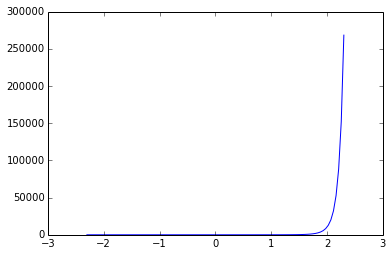

In [15]:
%matplotlib inline
from pylab import *
figure()
plot(np.log(param_a), res_arr)
show()

In [16]:
print res_arr

[[  1.12893985e+01]
 [  1.13036030e+01]
 [  1.13185272e+01]
 [  1.13342099e+01]
 [  1.13506922e+01]
 [  1.13680176e+01]
 [  1.13862326e+01]
 [  1.14053863e+01]
 [  1.14255310e+01]
 [  1.14467223e+01]
 [  1.14690193e+01]
 [  1.14924851e+01]
 [  1.15171870e+01]
 [  1.15431966e+01]
 [  1.15705906e+01]
 [  1.15994509e+01]
 [  1.16298650e+01]
 [  1.16619270e+01]
 [  1.16957374e+01]
 [  1.17314044e+01]
 [  1.17690442e+01]
 [  1.18087819e+01]
 [  1.18507522e+01]
 [  1.18951006e+01]
 [  1.19419843e+01]
 [  1.19915735e+01]
 [  1.20440528e+01]
 [  1.20996223e+01]
 [  1.21585000e+01]
 [  1.22209235e+01]
 [  1.22871518e+01]
 [  1.23574686e+01]
 [  1.24321847e+01]
 [  1.25116414e+01]
 [  1.25962147e+01]
 [  1.26863190e+01]
 [  1.27824130e+01]
 [  1.28850049e+01]
 [  1.29946598e+01]
 [  1.31120072e+01]
 [  1.32377508e+01]
 [  1.33726789e+01]
 [  1.35176776e+01]
 [  1.36737455e+01]
 [  1.38420123e+01]
 [  1.40237590e+01]
 [  1.42204440e+01]
 [  1.44337328e+01]
 [  1.46655344e+01]
 [  1.49180446e+01]
